This Notebook is dedicated to comparing our proposed apporach to the DPD_F benchmark dataset
It uses the DPD_F_Comparision.csv file which represents the embeddings of the DPD_F dataset using the CodeT5+ embedding model

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit

c:\Python\Python310\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data=pd.read_csv("DPD_F_Comparison.csv")
data.head()

,Directory,File,DesignPattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_290,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299
0,3taps-Java-Client,Annotation,NaN,-0.020778,-0.010467,-0.059825,-0.055491,-0.061348,-0.032889,-0.069892,...,0.019179,-0.096227,0.000699,0.085634,0.035166,-0.032750,0.034423,-0.029778,-0.034509,0.006365
1,3taps-Java-Client,AnnotationOption,NaN,-0.012401,-0.062120,0.001428,-0.079070,-0.072282,-0.029502,-0.044718,...,0.031490,-0.081187,-0.031905,0.067108,-0.014722,-0.021626,-0.041645,-0.054959,-0.081315,-0.096710
2,3taps-Java-Client,BestMatchResponse,NaN,0.013355,-0.105876,-0.080383,-0.022231,-0.026481,-0.076197,-0.077707,...,0.019682,0.005187,-0.076208,0.095335,0.025290,0.016518,0.010547,-0.047515,-0.015986,-0.062015
3,3taps-Java-Client,Category,NaN,0.041511,-0.016631,-0.073963,-0.073377,-0.049394,-0.042892,-0.062524,...,0.041403,-0.071629,0.018079,0.064842,0.023309,-0.065242,-0.003762,-0.057213,-0.012364,-0.002805
4,3taps-Java-Client,CreateResponse,NaN,-0.001339,-0.066273,0.029215,-0.064276,-0.051525,-0.075154,-0.087946,...,0.060142,-0.027906,0.010883,0.095766,-0.000684,-0.041709,0.033510,-0.058332,0.045500,-0.023621


In [3]:
data["DesignPattern"].unique()

array([nan, 'Facade', 'Memento', 'Singleton', 'Proxy', 'Prototype',
       'Observer', 'Decorator', 'Adapter', 'AbstractFactory',
       'FactoryMethod', 'Builder', 'Visitor'], dtype=object)

In [4]:
data["DesignPattern"].value_counts()

DesignPattern
Observer           91
Singleton          77
Prototype          72
Builder            71
Proxy              69
Facade             67
Decorator          66
Visitor            66
Memento            55
FactoryMethod      53
Adapter            50
AbstractFactory    45
Name: count, dtype: int64

In [5]:
data["DesignPattern"].fillna('Unknown', inplace=True)
data["DesignPattern"].value_counts()

DesignPattern
Observer           91
Unknown            89
Singleton          77
Prototype          72
Builder            71
Proxy              69
Facade             67
Decorator          66
Visitor            66
Memento            55
FactoryMethod      53
Adapter            50
AbstractFactory    45
Name: count, dtype: int64

In [6]:
import pandas as pd

# Assuming 'data' is your DataFrame with the dataset
unknown_class = data[data['DesignPattern'] == 'Unknown']

# Randomly sample 130 instances from the "Unknown" class
sampled_unknown = unknown_class.sample(n=80, random_state=42)

# Create a DataFrame with the other classes
other_classes = data[data['DesignPattern'] != 'Unknown']

# Concatenate the sampled "Unknown" class with the other classes
data = pd.concat([sampled_unknown, other_classes])

# Now, 'final_dataset' contains only 130 instances of the "Unknown" class

data["DesignPattern"].value_counts()

DesignPattern
Observer           91
Unknown            80
Singleton          77
Prototype          72
Builder            71
Proxy              69
Facade             67
Decorator          66
Visitor            66
Memento            55
FactoryMethod      53
Adapter            50
AbstractFactory    45
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'pattern' is the target column
label_encoder = LabelEncoder()
data['pattern_encoded'] = label_encoder.fit_transform(data['DesignPattern'])


In [8]:
y = data['pattern_encoded']
X = data.drop(['DesignPattern', 'pattern_encoded','Directory','File'], axis=1)  # Features

In [9]:
from sklearn.model_selection import train_test_split
# Initialize StratifiedShuffleSplit with a 30% test size
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the stratified split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [10]:
data.head()

,Directory,File,DesignPattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299,pattern_encoded
428,jbehave-core,AnnotatedEmbedderUsingGuice,Unknown,0.039592,0.027598,-0.043881,0.007153,-0.041113,0.007994,-0.120436,...,-0.036767,-0.076652,-0.024544,0.070904,0.001970,-0.053771,0.045077,-0.025749,-0.008610,11
438,jbehave-core,CalendarConverter,Unknown,0.014730,0.020159,-0.049412,-0.051272,-0.068181,0.002540,-0.094778,...,0.006633,-0.017261,0.022710,0.000378,-0.015617,0.010083,0.018406,0.041100,-0.006728,11
198,ChenSun,ExportControlled,Unknown,-0.012431,0.022257,-0.012433,0.007767,0.061962,-0.012009,-0.088262,...,0.026986,0.001083,-0.020443,0.011695,0.007182,0.040004,-0.001581,0.018308,0.083404,11
12,3taps-Java-Client,Source,Unknown,-0.036187,-0.114372,-0.031178,-0.065169,-0.042017,-0.012588,-0.039773,...,-0.100436,-0.070085,0.063377,0.006540,-0.024890,-0.056974,-0.048015,-0.077697,-0.039913,11
433,jbehave-core,AnnotatedEmbedderUsingSpringAndSteps,Unknown,-0.006806,0.015416,-0.051031,0.000726,-0.049957,0.044302,-0.082415,...,-0.079367,-0.054700,0.027035,0.123585,0.000548,-0.060549,0.041672,-0.010489,0.006350,11


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize different classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    # Calculate precision (macro-average)
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores[name] = precision
    
    # Calculate recall (macro-average)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores[name] = recall
    
    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[name] = f1
    
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


Support Vector Machine Metrics:
Accuracy: 0.88
Precision (Macro): 0.88
Recall (Macro): 0.86
F1-Score (Macro): 0.87
------------------------------
Logistic Regression Metrics:
Accuracy: 0.83
Precision (Macro): 0.83
Recall (Macro): 0.81
F1-Score (Macro): 0.80
------------------------------
Multi-layer Perceptron Metrics:
Accuracy: 0.86
Precision (Macro): 0.85
Recall (Macro): 0.85
F1-Score (Macro): 0.85
------------------------------


In [12]:
from sklearn.metrics import classification_report


# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Print the classification report
    report = classification_report(y_test, y_pred, target_names=["Singleton","Observer","Memento","Proxy","Prototype","Builder","AbstractFactory","FactoryMethod","Facade","Adapter","Decorator","Visitor","Unknown"])
    print(f'{name} Classification Report:\n{report}')
    print('-' * 30)


Support Vector Machine Classification Report:
                 precision    recall  f1-score   support

      Singleton       0.91      0.77      0.83        13
       Observer       1.00      0.80      0.89        15
        Memento       0.58      0.71      0.64        21
          Proxy       0.95      0.95      0.95        20
      Prototype       0.95      0.95      0.95        20
        Builder       0.60      0.56      0.58        16
AbstractFactory       1.00      1.00      1.00        17
  FactoryMethod       0.96      1.00      0.98        27
         Facade       0.95      0.91      0.93        22
        Adapter       0.86      0.90      0.88        21
      Decorator       0.80      0.87      0.83        23
        Visitor       0.92      0.96      0.94        24
        Unknown       1.00      0.85      0.92        20

       accuracy                           0.88       259
      macro avg       0.88      0.86      0.87       259
   weighted avg       0.88      0.88    

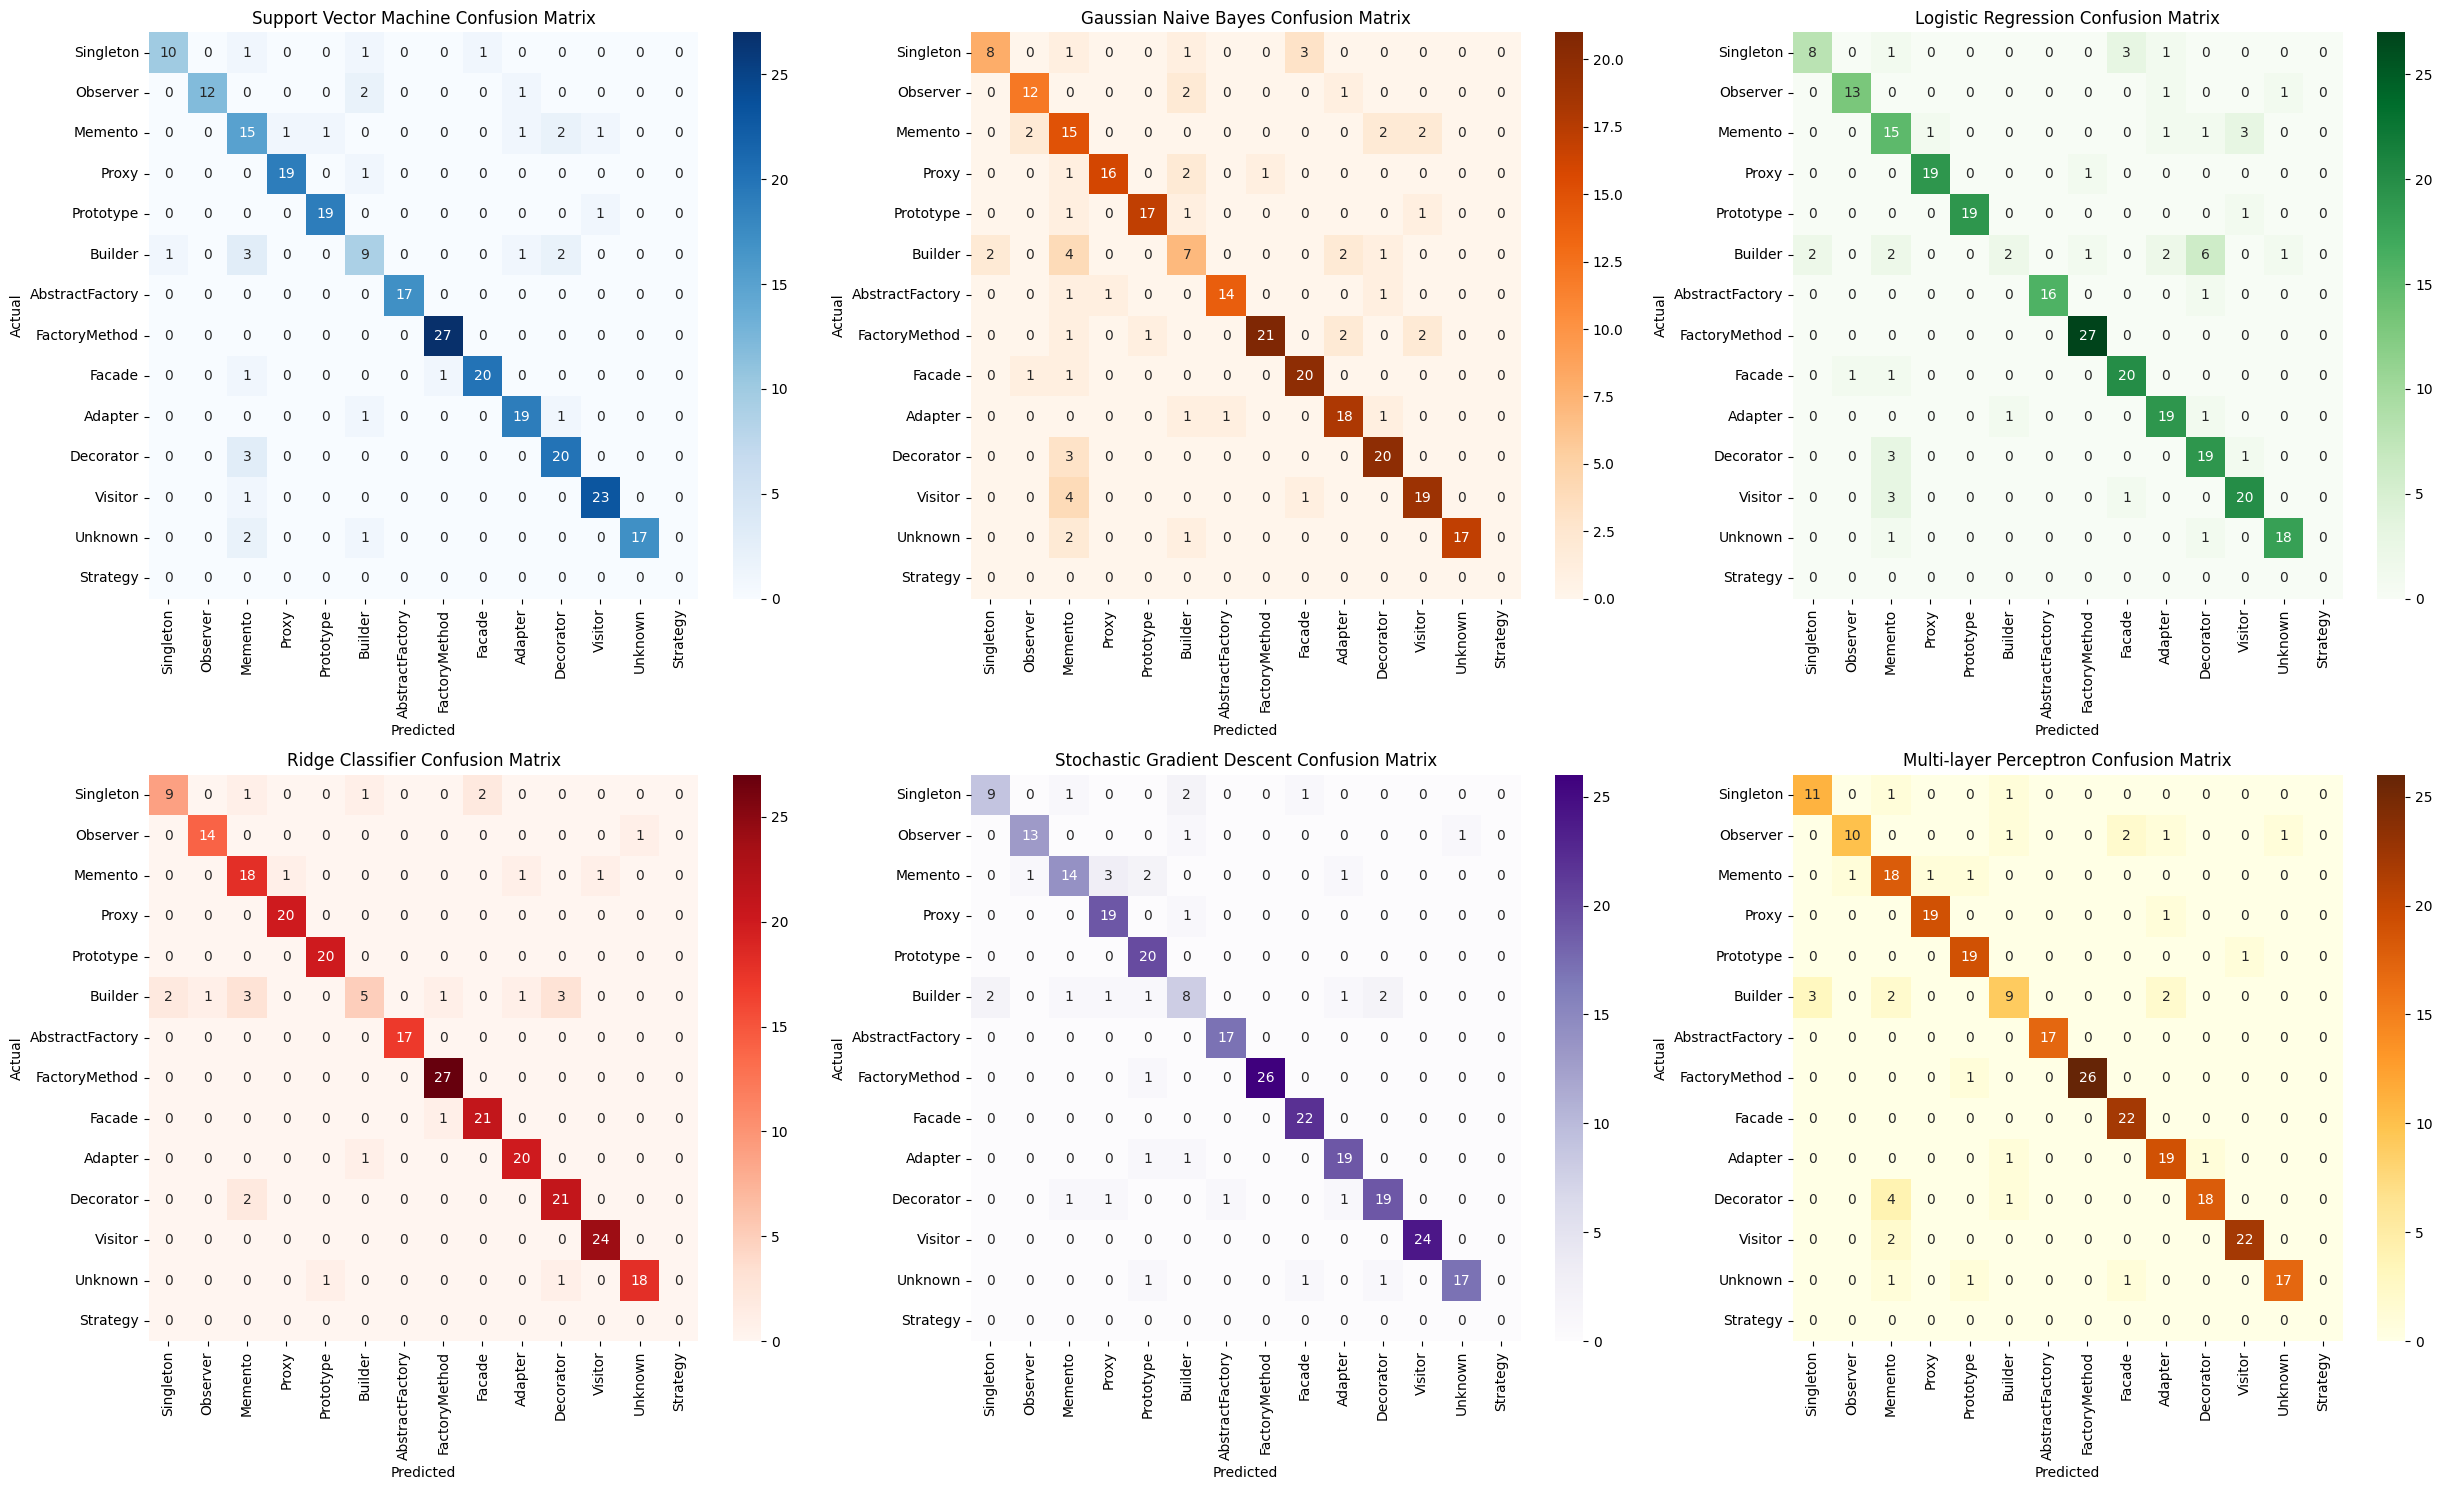

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier

# Initialize different classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'Stochastic Gradient Descent': SGDClassifier(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}
colormaps = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples', 'YlOrBr']
# Create subplots for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
class_labels = ["Singleton","Observer","Memento","Proxy","Prototype","Builder","AbstractFactory","FactoryMethod","Facade","Adapter","Decorator","Visitor","Unknown","Strategy"]

for i, (name, classifier) in enumerate(classifiers.items()):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict using the classifier
    y_pred = classifier.predict(X_test)

    # Map integer labels to their corresponding string class names
    y_test_str = [class_labels[i] for i in y_test]
    y_pred_str = [class_labels[i] for i in y_pred]

    # Calculate the confusion matrix using the string labels
    cm = confusion_matrix(y_test_str, y_pred_str, labels=class_labels)

    # Create a heatmap for the confuasion matrix
    ax = axes[i // 3, i % 3]
    sns.heatmap(cm, annot=True, fmt='d', cmap=colormaps[i], xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    for label_idx, label in enumerate(class_labels):
        true_positive = cm[label_idx, label_idx]
        false_positive = np.sum(cm[:, label_idx]) - true_positive
        false_negative = np.sum(cm[label_idx, :]) - true_positive
        true_negative = np.sum(cm) - (true_positive + false_positive + false_negative)

plt.tight_layout()
plt.show()


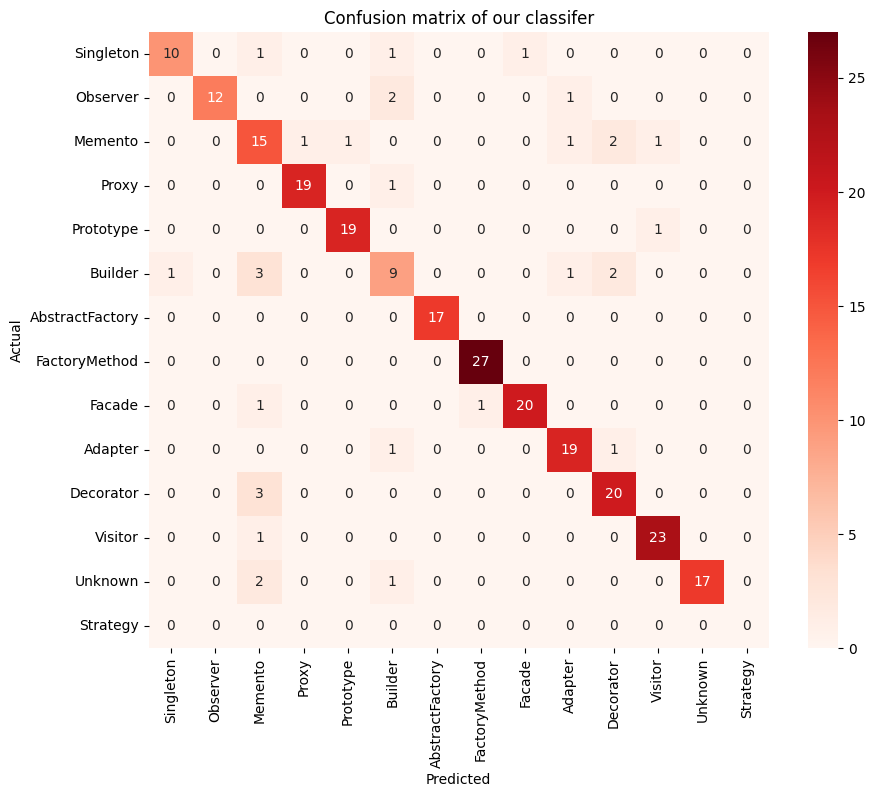

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) classifier
classifier = SVC()

# Train the SVM classifier
classifier.fit(X_train, y_train)

# Predict using the SVM classifier
y_pred = classifier.predict(X_test)

# Map integer labels to their corresponding string class names
y_test_str = [class_labels[i] for i in y_test]
y_pred_str = [class_labels[i] for i in y_pred]

# Calculate the confusion matrix using the string labels
cm = confusion_matrix(y_test_str, y_pred_str, labels=class_labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion matrix of our classifer')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
